# Project Utility



>This project is a collection of essential functions and utilities that I frequently use in my data analysis workflows. 

## Why This Project Exists

As a data analyst, I found myself repeatedly writing the same helper functions across different projects. ProjectUtility centralizes these common utilities into a single, well-documented package that can be easily imported into any analysis.

### Documentation
[![](https://img.shields.io/badge/Delightful%20data-analysis-green?style=flat)](https://mtinti.github.io/ProjectUtility/)

### Install ProjectUtility in Development mode

If you are new to using `nbdev` here are some useful pointers to get you started.

```sh
# make sure ProjectUtility package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to ProjectUtility
$ nbdev_prepare
```

## Usage

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/mtinti/ProjectUtility.git
```

or from [conda][conda]

```sh
$ conda install -c mtinti ProjectUtility
```

or from [pypi][pypi]


```sh
$ pip install ProjectUtility
```


[repo]: https://github.com/mtinti/ProjectUtility
[docs]: https://mtinti.github.io/ProjectUtility/
[pypi]: https://pypi.org/project/ProjectUtility/
[conda]: https://anaconda.org/mtinti/ProjectUtility

# Data Science Q&A

## 🔍 Question
> Can you visualize the pattern of missing values in my dataset?



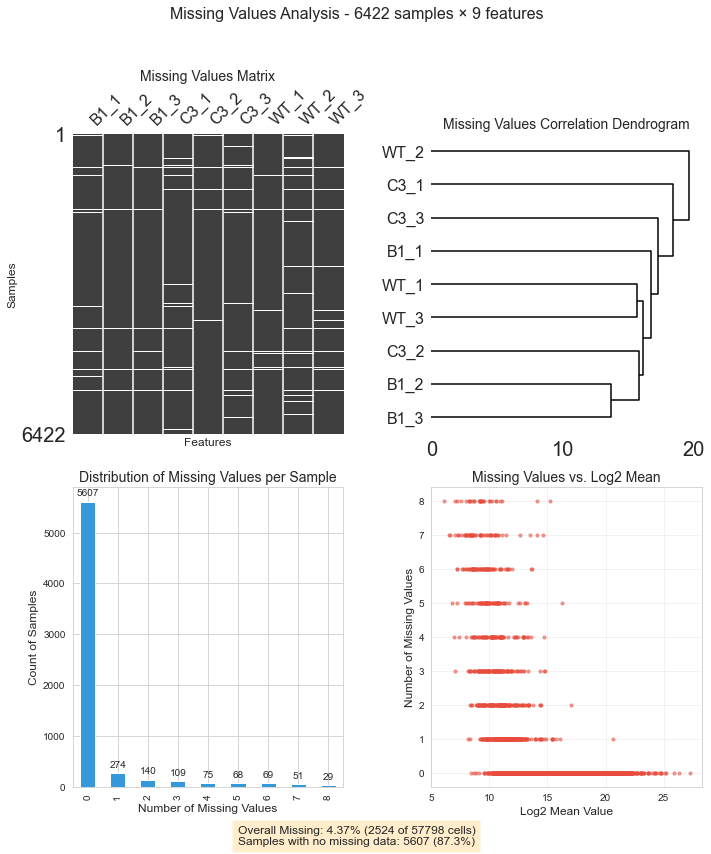

In [ ]:
from ProjectUtility import mis_val_utility
import pandas as pd
df = pd.read_csv('../tests/missing_values/test_df.csv.gz',index_col=[0])
mv_analyzer = mis_val_utility.MissingValuesAnalyzer(df)
fig, axes, summary = mv_analyzer.plot_missing_dashboard(figsize=(10, 12))

## 🔍 Question
> Can you reduce the dimensionality of my dataset to visualize patterns and relationships?

Explained variance ratio: [0.81546122 0.12599201 0.02508285 0.01313488 0.00740248]


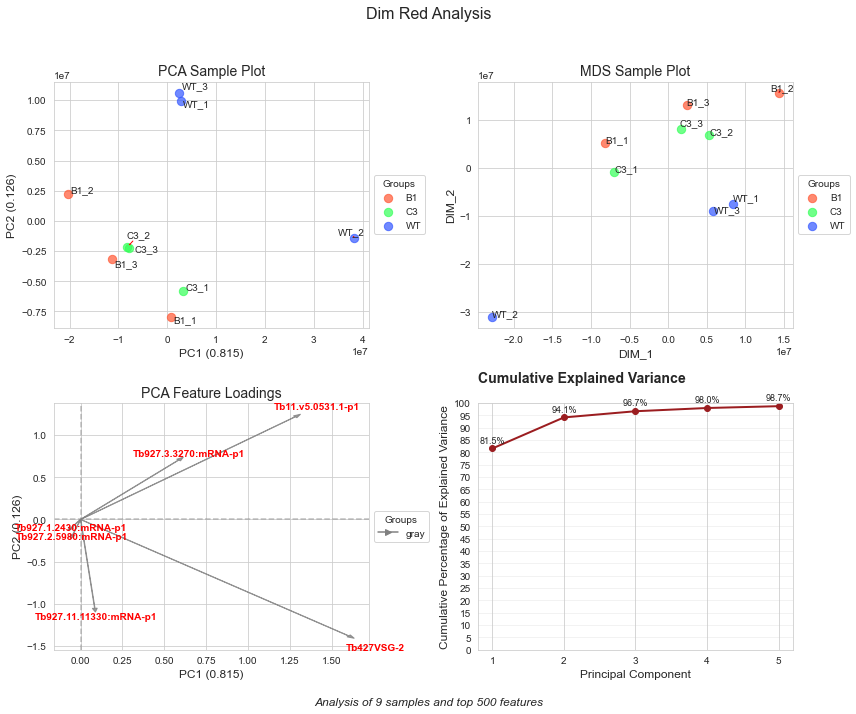

In [ ]:
from ProjectUtility import dim_red_utility
import matplotlib.pyplot as plt
from ProjectUtility.core import convert_palette_to_hex, create_group_color_mapping


sample_groups, color_dictionary = create_group_color_mapping(df.columns, 
                                                             group_size=3, 
                                                             return_color_to_group=True)

color_dictionary = {'#FF5733': 'B1', '#33FF57': 'C3', '#3357FF': 'WT'}

fig, axes, results_dict = dim_red_utility.create_dim_reduction_dashboard(
    in_df=df.dropna(),
    sample_palette=sample_groups,
    feature_palette={},
    top=500,
    color_dictionary=color_dictionary,
    title="Dim Red Analysis",
    figsize=(12, 10)  
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## 🔍 Question
> Can you assess the reproducibility of my dataset?

Coefficient of Variation Results:
{'B1': 1.17165193540931, 'WT': 1.5810533161044804, 'C3': 1.191373053916986}


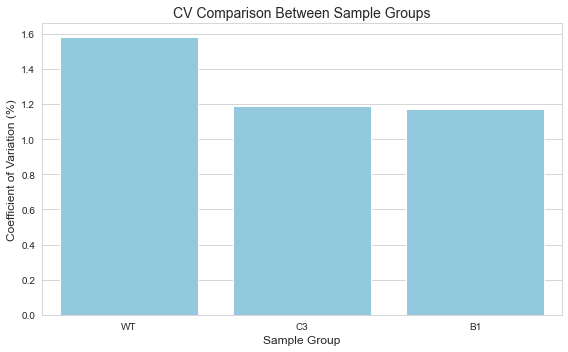

In [ ]:
from ProjectUtility import correlation_utilities
import numpy as np
cv_sample_groups = [
    'B1', 'B1', 'B1', 
    'C3', 'C3', 'C3',
    'WT', 'WT', 'WT']
analyzer = correlation_utilities.ReplicateAnalyzer(
    np.log10(df.dropna()), cv_sample_groups)
# Calculate coefficient of variation
cv_results = analyzer.calculate_coefficient_of_variation()
print("Coefficient of Variation Results:")
print(cv_results)

# Visualize the results
fig = analyzer.plot_coefficient_of_variation(
    title="CV Comparison Between Sample Groups",
    figsize=(8, 5)
)

> Can you do the same row wise? 


Generating CV distribution boxplot...


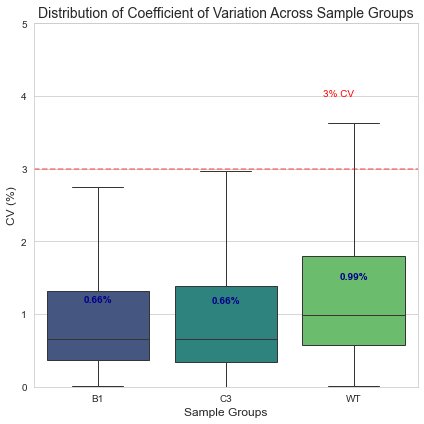

In [ ]:
cv_distribution = analyzer.calculate_cv_distribution(exclude_zeros=True)
# Create the CV boxplot
print("\nGenerating CV distribution boxplot...")
fig2 = analyzer.plot_cv_boxplot(
    min_y=0,  # Minimum y-axis value
    max_y=5,  # Maximum y-axis value
    figsize=(6, 6),
    color_palette="viridis",
    display_median=True,
    reference_line=3,  
    title="Distribution of Coefficient of Variation Across Sample Groups"
)

# Show plots
plt.tight_layout()
plt.show()

## 🔍 Question
> Can you show me an interactive volcan plot?

In [ ]:
from ProjectUtility import diff_expr
column_mapping = {
    'log2fc': 'logFC',            # logFC column from your data
    'fdr': 'FDR',                # FDR column from your data
    'avg_intensity': 'log_AveExpr', # log_AveExpr column from your data
    'id': 'Gene_id',            # Gene_acc column from your data
    'description': 'Desc'         # Desc column from your data
}

file_path = '../tests/volcano_plots/for_web_limma_WT-C3.csv.zip'
# Create the PlotData instance
plot_data = diff_expr.PlotData(file_path, column_mapping,
                               highlight_ids=['Blasticidin','Puromycin'])
# Quick access to all plotting data
_ = plot_data.get_data_for_plotting()

In [ ]:
fig = diff_expr.create_volcano_ma_plots(
    plot_data,
    plot_title="Differential Expression Analysis: Sample vs Control"
)

In [ ]:
fig.show('iframe')

![](nbs/iframe_figures/fig1.png)

> you can play with the interactive output here: https://mtinti.github.io/ProjectUtility/

## Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [conda][conda] and [pypi][pypi] respectively.

[repo]: https://github.com/mtinti/ProjectUtility
[docs]: https://mtinti.github.io/ProjectUtility/
[pypi]: https://pypi.org/project/ProjectUtility/
[conda]: https://anaconda.org/mtinti/ProjectUtility

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()